/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


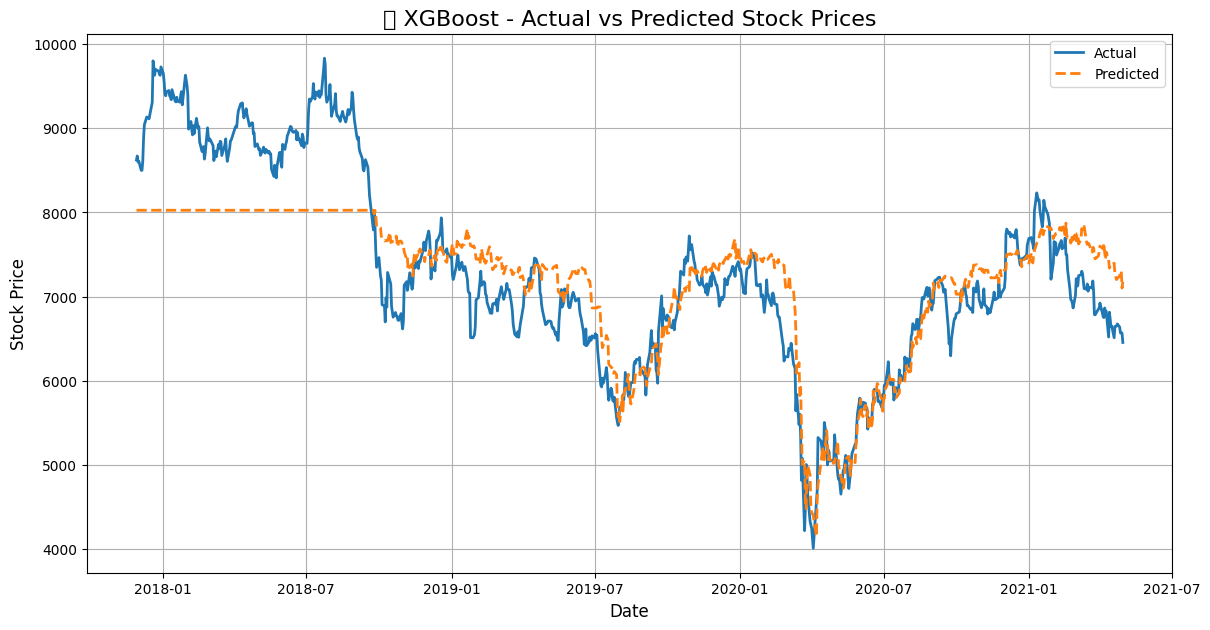

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


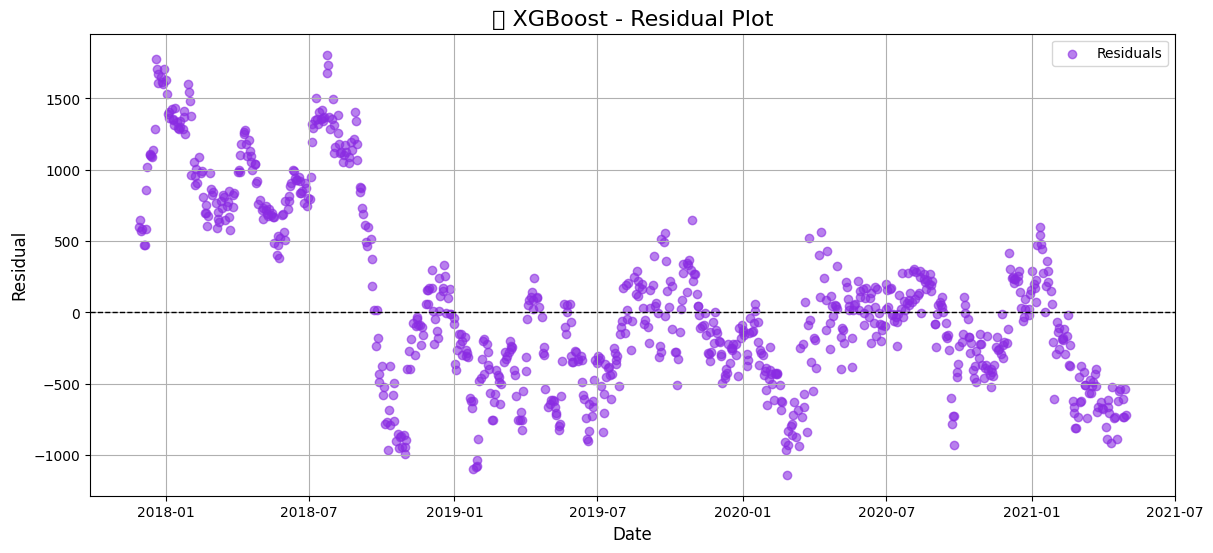

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


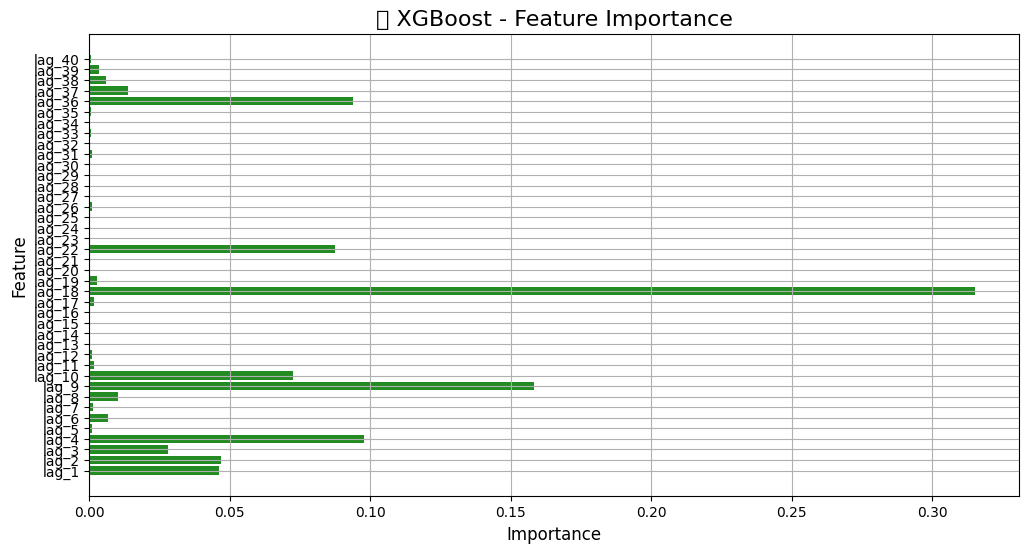

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0306
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0027
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0017
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0015
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0014
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0016
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0013
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0014
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0015
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0012
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0012
Epoch 13/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0014
Epoch 14/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0012
Epoch 15/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


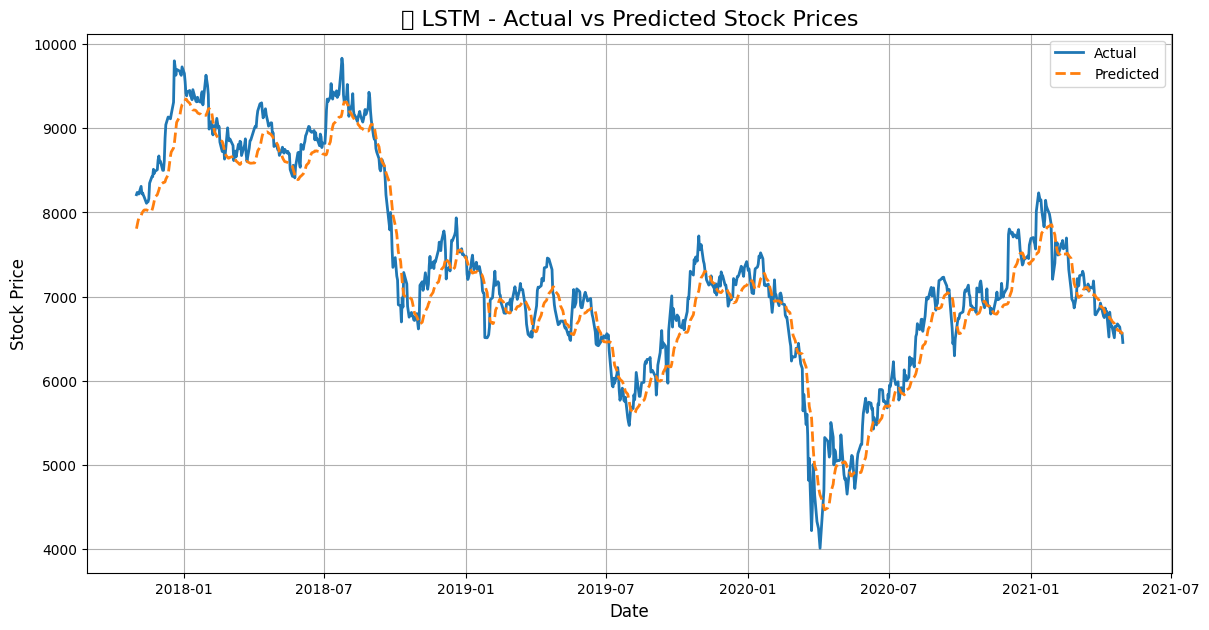

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


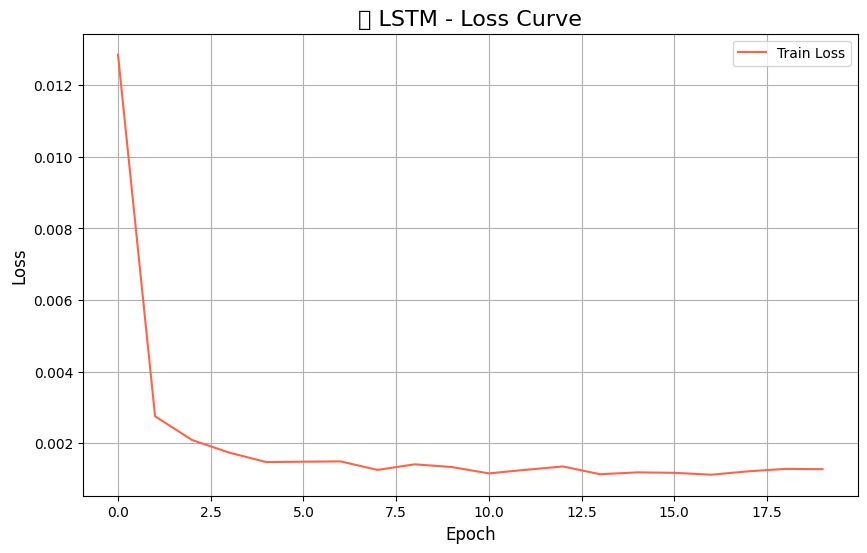

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


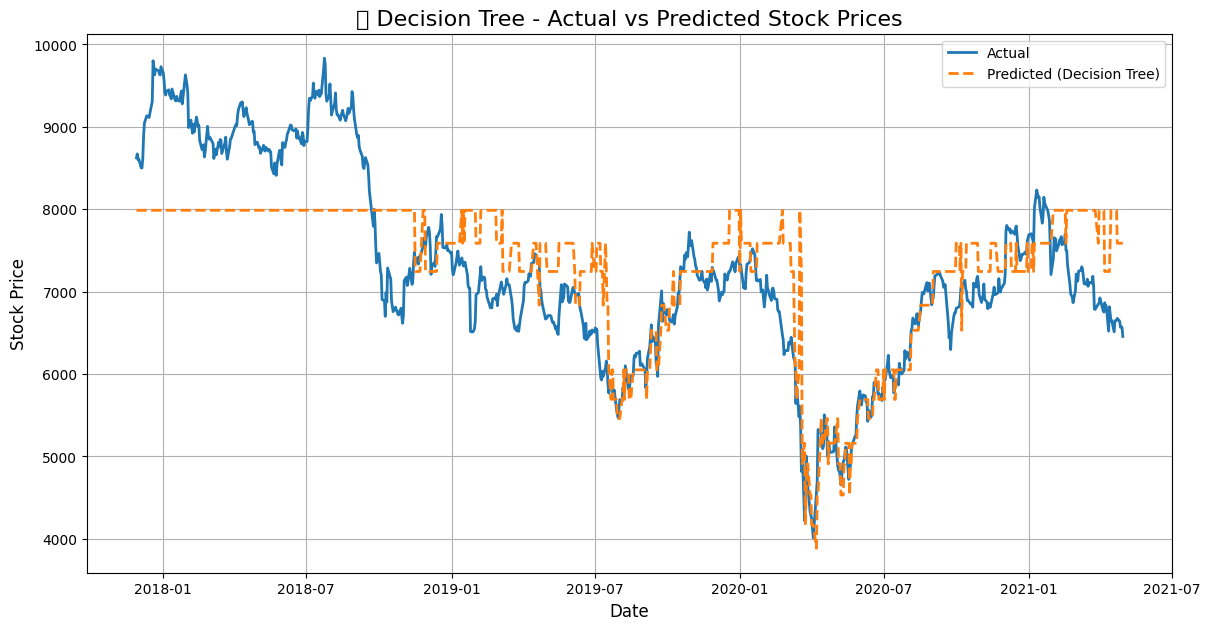

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


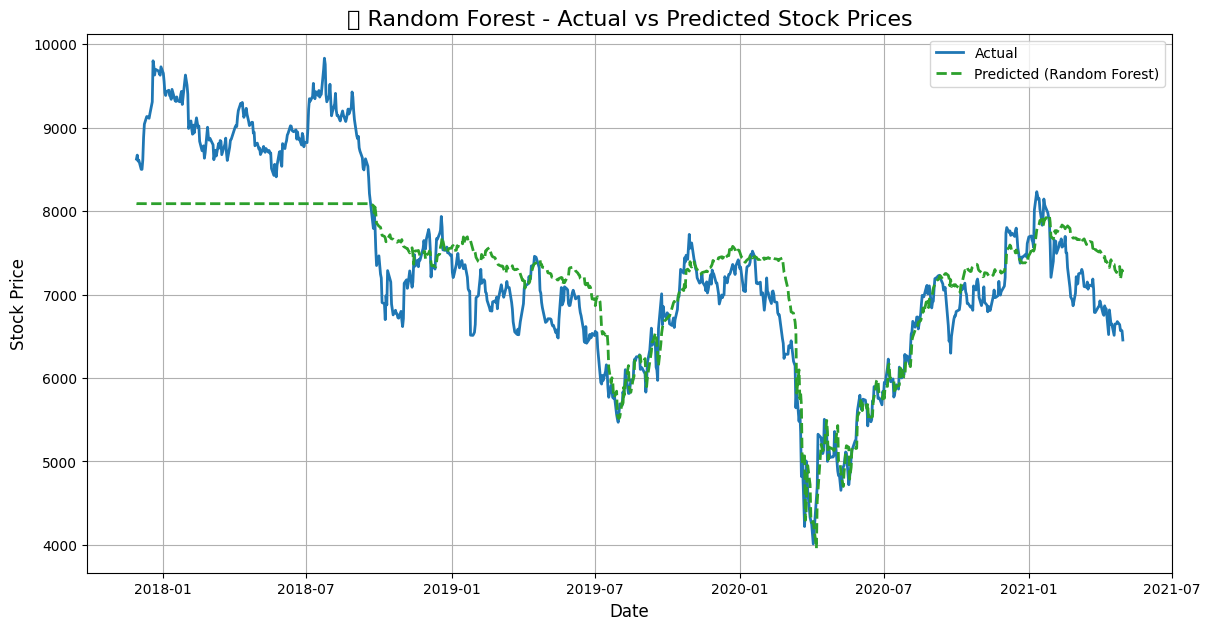


=== ✅ Final Results ===
Model                RMSE       R²        
----------------------------------------
XGBoost              631.39     0.7165    
LSTM                 288.53     0.9404    
Decision Tree        755.38     0.5942    
Random Forest        599.71     0.7442    


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load data
file_path = 'MARUTI.csv'
df = pd.read_csv(file_path)

# Convert Date column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Keep only the Close column
data = df['Close']

# Split into training and test sets
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

### ===========================
### 🏆 METHOD 1: XGBOOST
### ===========================

# Create lag features (up to 20 lags)
lags = 40
train_lags = pd.concat([train.shift(i) for i in range(1, lags + 1)], axis=1).dropna()
test_lags = pd.concat([test.shift(i) for i in range(1, lags + 1)], axis=1).dropna()

# Rename columns to avoid duplicates
train_lags.columns = [f"lag_{i}" for i in range(1, lags + 1)]
test_lags.columns = [f"lag_{i}" for i in range(1, lags + 1)]

# Align target values
train_target = train.iloc[lags:]
test_target = test.iloc[lags:]

# Train XGBoost model
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=200, learning_rate=0.05, max_depth=5)
xgb.fit(train_lags, train_target)

# Predict on test set
xgb_predictions = xgb.predict(test_lags)

# Calculate RMSE and R-squared
rmse_xgb = np.sqrt(mean_squared_error(test_target, xgb_predictions))
r2_xgb = r2_score(test_target, xgb_predictions)

# ===========================
# 🌟 1. Actual vs Predicted Plot
# ===========================
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label="Actual", color="#1f77b4", linewidth=2)
plt.plot(test_target.index, xgb_predictions, label="Predicted", color="#ff7f0e", linestyle='--', linewidth=2)
plt.title("📈 XGBoost - Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 🌟 2. Residual Plot
# ===========================
residuals = test_target - xgb_predictions
plt.figure(figsize=(14, 6))
plt.scatter(test_target.index, residuals, color='#8a2be2', label='Residuals', alpha=0.6)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("📉 XGBoost - Residual Plot", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Residual", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 🌟 3. Feature Importance Plot
# ===========================
plt.figure(figsize=(12, 6))
importance = xgb.feature_importances_
plt.barh(train_lags.columns, importance, color='#228B22')
plt.title("🚀 XGBoost - Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True)
plt.show()

### ===========================
### 🏆 METHOD 2: LSTM (Optional)
### ===========================

# Scale the data for LSTM
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train.values.reshape(-1, 1))
test_scaled = scaler.transform(test.values.reshape(-1, 1))

# Create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 20
X_train, y_train = create_sequences(train_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

# Define LSTM model
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Predict on test set
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Calculate RMSE and R-squared
rmse_lstm = np.sqrt(mean_squared_error(test[sequence_length:], lstm_predictions))
r2_lstm = r2_score(test[sequence_length:], lstm_predictions)

# ===========================
# 🌟 4. LSTM - Actual vs Predicted Plot
# ===========================
plt.figure(figsize=(14, 7))
plt.plot(test.index[sequence_length:], test[sequence_length:], label="Actual", color="#1f77b4", linewidth=2)
plt.plot(test.index[sequence_length:], lstm_predictions, label="Predicted", color="#ff7f0e", linestyle='--', linewidth=2)
plt.title("📈 LSTM - Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 🌟 5. LSTM - Loss Curve
# ===========================
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss', color='#ff6347')
plt.title('📉 LSTM - Loss Curve', fontsize=16)
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# ===========================
# 🌟 Decision Tree Regressor
# ===========================
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(train_lags, train_target)

# Predict
dt_predictions = dt.predict(test_lags)

# Evaluate
rmse_dt = np.sqrt(mean_squared_error(test_target, dt_predictions))
r2_dt = r2_score(test_target, dt_predictions)

# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label="Actual", color="#1f77b4", linewidth=2)
plt.plot(test_target.index, dt_predictions, label="Predicted (Decision Tree)", color="#ff7f0e", linestyle='--', linewidth=2)
plt.title("📈 Decision Tree - Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 🌟 Random Forest Regressor
# ===========================
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(train_lags, train_target)

# Predict
rf_predictions = rf.predict(test_lags)

# Evaluate
rmse_rf = np.sqrt(mean_squared_error(test_target, rf_predictions))
r2_rf = r2_score(test_target, rf_predictions)

# Plot Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(test_target.index, test_target, label="Actual", color="#1f77b4", linewidth=2)
plt.plot(test_target.index, rf_predictions, label="Predicted (Random Forest)", color="#2ca02c", linestyle='--', linewidth=2)
plt.title("📈 Random Forest - Actual vs Predicted Stock Prices", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# ===========================
# 🌟 Final Output
# ===========================
print("\n=== ✅ Final Results ===")
print(f"{'Model':<20} {'RMSE':<10} {'R²':<10}")
print(f"{'-'*40}")
print(f"{'XGBoost':<20} {rmse_xgb:<10.2f} {r2_xgb:<10.4f}")
print(f"{'LSTM':<20} {rmse_lstm:<10.2f} {r2_lstm:<10.4f}")
print(f"{'Decision Tree':<20} {rmse_dt:<10.2f} {r2_dt:<10.4f}")
print(f"{'Random Forest':<20} {rmse_rf:<10.2f} {r2_rf:<10.4f}")


         Date  Symbol Series  Prev Close    Open    High     Low   Last  \
0  2003-07-09  MARUTI     EQ      125.00  164.90  170.40  155.00  164.0   
1  2003-07-10  MARUTI     EQ      164.30  167.00  168.70  164.50  167.0   
2  2003-07-11  MARUTI     EQ      167.00  167.75  174.85  166.25  173.6   
3  2003-07-14  MARUTI     EQ      173.35  174.25  179.25  174.25  178.6   
4  2003-07-15  MARUTI     EQ      177.95  200.00  200.00  173.00  176.3   

    Close    VWAP    Volume      Turnover  Trades  Deliverable Volume  \
0  164.30  165.95  35164283  5.835528e+14     NaN           8537695.0   
1  167.00  166.74  10464179  1.744820e+14     NaN           4363947.0   
2  173.35  172.45  11740117  2.024622e+14     NaN           3014852.0   
3  177.95  177.91   5982324  1.064313e+14     NaN           1949217.0   
4  176.20  176.88   6173689  1.092001e+14     NaN           1307694.0   

   %Deliverble  
0       0.2428  
1       0.4170  
2       0.2568  
3       0.3258  
4       0.2118  


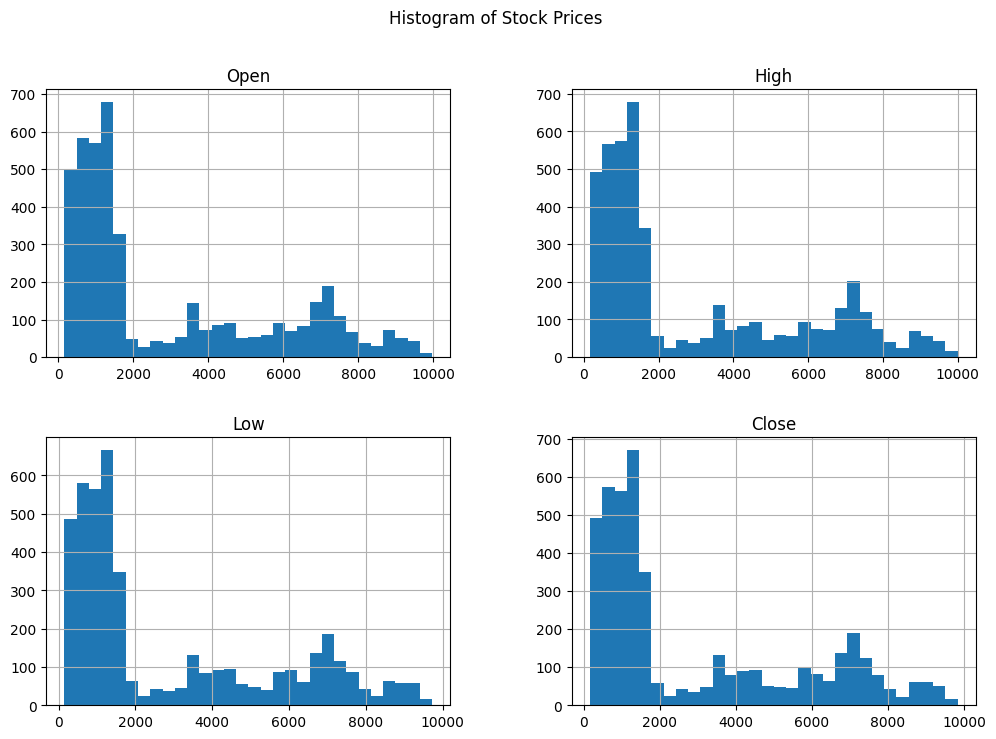

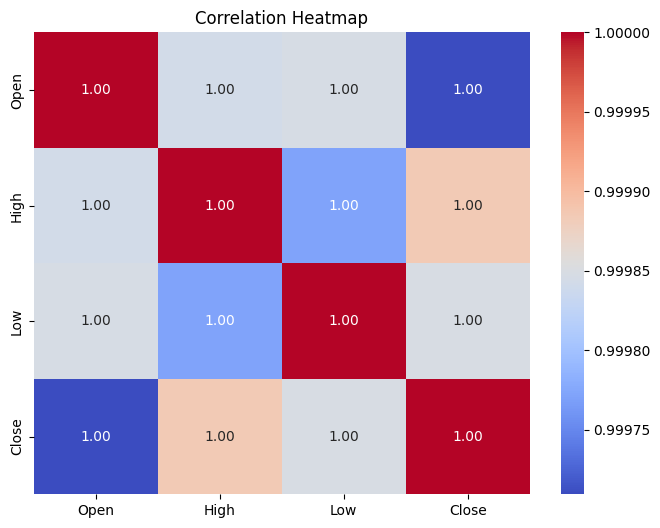

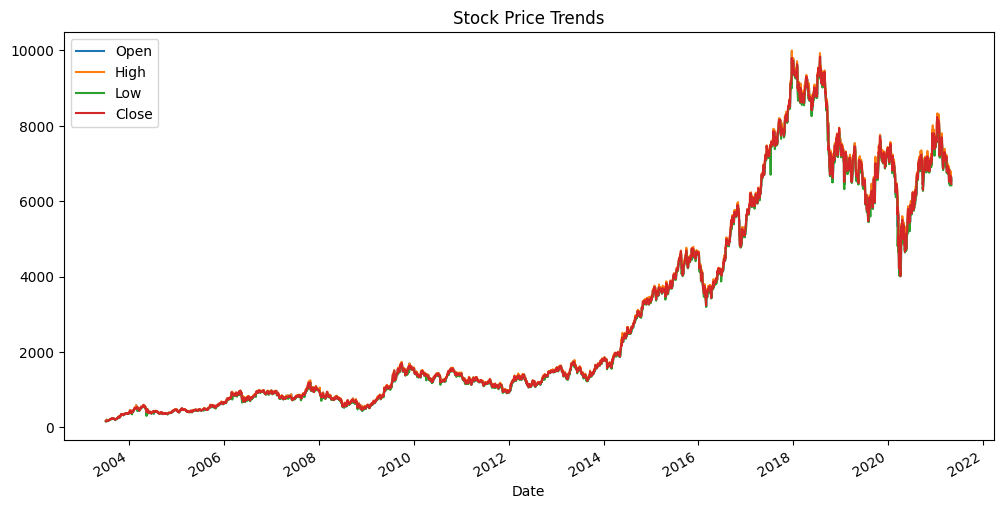

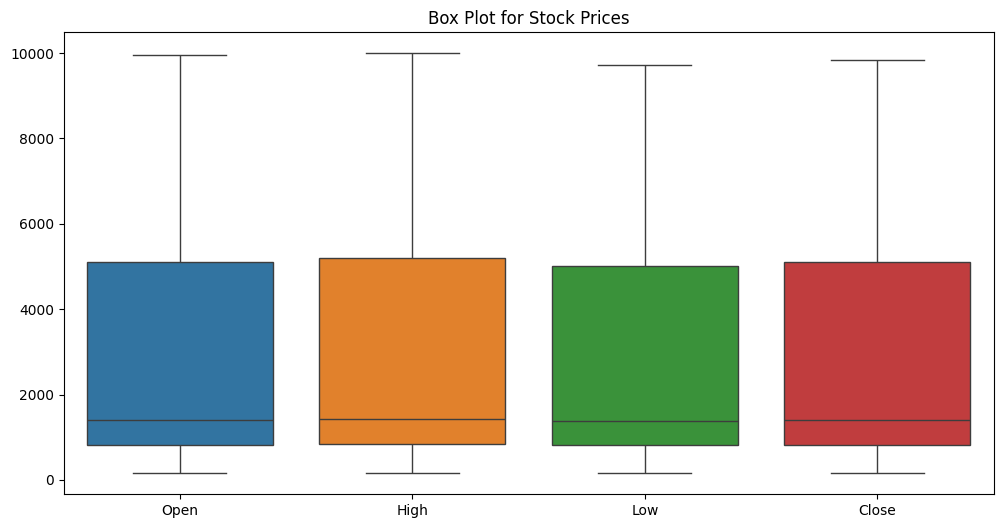

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('MARUTI.csv')

# Display the first few rows to inspect the data
print(df.head())

# Histograms for Open, High, Low, and Close prices
df[['Open', 'High', 'Low', 'Close']].hist(figsize=(12, 8), bins=30)
plt.suptitle('Histogram of Stock Prices')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Line plots for stock prices
df['Date'] = pd.to_datetime(df['Date'])  # Ensure Date is in datetime format
df.set_index('Date', inplace=True)
df[['Open', 'High', 'Low', 'Close']].plot(figsize=(12, 6), title='Stock Price Trends')
plt.show()

# Box plots for detecting outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title('Box Plot for Stock Prices')
plt.show()
